In [1]:
import numpy as np
from neural_network.layer import *
from neural_network.net import *
from queue import Queue
import matplotlib.pyplot as plt
from tqdm import tqdm
from neural_network.trainutils import Dataset, train_test_split
import os

In [2]:
current_dir = os.getcwd()
face_dir = os.path.join(current_dir, "cmu+face+images", "faces")
dataset = Dataset(face_dir, flatten=False)

In [3]:
dataset.data.shape

(624, 120, 128)

In [4]:
train, validation, test = train_test_split(dataset, (0.8, 0.0, 0.2))

In [5]:
len(train)

499

In [6]:
dataset[500][0].shape

(1, 1, 120, 128)

In [7]:
input_shape = train[0][0].shape
input_shape

(1, 1, 120, 128)

In [8]:
train[0]

(array([[[[ 0.48424327,  0.46013846,  0.2415545 , ...,  0.56250844,
            0.55248019,  0.53722643],
          [ 0.44260623,  0.37714921,  0.3087452 , ...,  0.51571389,
            0.62474619,  0.46036514],
          [ 0.63864478,  0.66025117,  0.57663523, ...,  0.59823288,
            0.6693594 ,  0.65116802],
          ...,
          [ 1.24007845,  0.73192692,  0.06895748, ..., -0.79025597,
           -0.80210645, -0.78496468],
          [ 1.13290128,  0.62554576,  0.03523963, ..., -0.78097913,
           -0.75951026, -0.76100932],
          [ 1.25689867,  0.91036269,  0.23789993, ..., -0.8199337 ,
           -0.78992638, -0.78413062]]]]),
 array([[0.],
        [1.],
        [0.],
        [0.]]))

In [9]:
kernel_shape = np.ndarray([1, 1, 3, 3])
pad = 1
stride = 1

conv1 = Conv2D(kernel_shape, pad, stride, layer_id=1) # 120x128
maxpool1 = MaxPool2D(2, 0, 2, conv1) # 60x64
relu1 = ReLU(maxpool1)

conv2 = Conv2D(kernel_shape, pad, stride, relu1, layer_id=2)
maxpool2 = MaxPool2D(2, 0, 2, conv2) # 30x32
relu2 = ReLU(maxpool2)

conv3 = Conv2D(kernel_shape, pad, stride, relu2, layer_id=3)
maxpool3 = MaxPool2D(2, 0, 2, conv3) # 15x16
relu3 = ReLU(maxpool3)

flatten = Flatten(relu3)

linear = Linear(15*16, len(dataset.keys), flatten)
softmax_layer = Softmax(linear)
loss_layer = CrossEntropy(softmax_layer)

model = NeuralNetwork(conv1, softmax_layer, loss_layer)

In [10]:
kernel_shape.shape

(1, 1, 3, 3)

In [11]:
print("Forward order:")
for layer in model._forward_order:
    print(layer)

print("\nBackward order:")
for layer in model._backward_order:
    print(layer)

Forward order:
Conv2D 1: (1, 1, 3, 3), pad=1, stride=1
MaxPool2D: (2, 2), pad=0, stride=2
ReLU
Conv2D 2: (1, 1, 3, 3), pad=1, stride=1
MaxPool2D: (2, 2), pad=0, stride=2
ReLU
Conv2D 3: (1, 1, 3, 3), pad=1, stride=1
MaxPool2D: (2, 2), pad=0, stride=2
ReLU
Flatten
Linear: (240, 1) -> (4, 1)
Softmax
CrossEntropy

Backward order:
CrossEntropy
Softmax
Linear: (240, 1) -> (4, 1)
Flatten
ReLU
MaxPool2D: (2, 2), pad=0, stride=2
Conv2D 3: (1, 1, 3, 3), pad=1, stride=1
ReLU
MaxPool2D: (2, 2), pad=0, stride=2
Conv2D 2: (1, 1, 3, 3), pad=1, stride=1
ReLU
MaxPool2D: (2, 2), pad=0, stride=2
Conv2D 1: (1, 1, 3, 3), pad=1, stride=1


In [12]:
loss_array = []
pbar = tqdm(range(50))
for i in pbar:
    epoch_loss = 0
    for data, label in train:
        print(data)
        #data = data.reshape(-1, 1)
        out = model.forward(data)
        #print(out)
        loss = model.loss_layer.forward(out, label)
        epoch_loss += loss
        model.backward()
        model.step()
    epoch_loss = epoch_loss / len(train)
    loss_array.append(epoch_loss)
    pbar.set_description(str(epoch_loss))

  0%|          | 0/50 [00:00<?, ?it/s]

[[[[ 0.48424327  0.46013846  0.2415545  ...  0.56250844  0.55248019
     0.53722643]
   [ 0.44260623  0.37714921  0.3087452  ...  0.51571389  0.62474619
     0.46036514]
   [ 0.63864478  0.66025117  0.57663523 ...  0.59823288  0.6693594
     0.65116802]
   ...
   [ 1.24007845  0.73192692  0.06895748 ... -0.79025597 -0.80210645
    -0.78496468]
   [ 1.13290128  0.62554576  0.03523963 ... -0.78097913 -0.75951026
    -0.76100932]
   [ 1.25689867  0.91036269  0.23789993 ... -0.8199337  -0.78992638
    -0.78413062]]]]
[[[[ 0.48424327  0.4265944   0.34516685 ...  1.43619515  1.56546466
     1.54299492]
   [ 0.41019348  0.41067209  0.41003636 ...  1.333142    1.41983819
     1.38983561]
   [ 0.60512382  0.69245382  0.67805961 ...  1.39815986  1.3899858
     1.31947909]
   ...
   [ 1.60872824  0.68535315 -0.17066497 ... -0.79025597 -0.80210645
    -0.78496468]
   [ 1.68791168  0.80621272  0.41647698 ... -0.78097913 -0.75951026
    -0.76100932]
   [ 1.6057265   0.91036269  0.85225379 ...  0.034

[1.78571381]:   0%|          | 0/50 [00:10<?, ?it/s]

[[[[-1.74204028 -1.68668137 -1.69254265 ... -0.86716072 -0.85011367
    -1.01010972]
   [-1.63181007 -1.70126941 -1.78460542 ... -0.82189574 -0.82087564
    -0.82659399]
   [-1.2720498  -1.40071856 -1.51946872 ... -0.85617982 -0.84395605
    -0.61862301]
   ...
   [-0.15259852 -0.24612233  0.02103299 ...  1.22305104  1.37070388
     1.5058632 ]
   [ 0.22109848  0.35454533  0.60709566 ...  1.23558522  1.31080787
     1.44561836]
   [ 0.40420842  0.47544552  0.61596384 ...  1.22564822  1.29598603
     1.44080829]]]]
[[[[-0.37201963 -1.58604919 -1.79615499 ...  0.40365631  0.39663643
     0.45985962]
   [ 0.1833042  -0.82967451 -1.78460542 ...  0.3670906   0.40790291
     0.53186287]
   [ 0.37047712 -1.07869204 -1.41804433 ...  0.38007097  0.52523411
     0.65116802]
   ...
   [-0.88989809 -0.94472893 -0.79368334 ... -0.60995982 -0.80210645
    -0.78496468]
   [-0.88892233 -0.91012337 -0.82254443 ... -0.60039128 -0.75951026
    -0.76100932]
   [-0.75855101 -0.74232255 -0.70725984 ... -0.5

[1.78571381]:   2%|▏         | 1/50 [00:10<08:56, 10.95s/it]

[[[[ 0.48424327  0.46013846  0.2415545  ...  0.56250844  0.55248019
     0.53722643]
   [ 0.44260623  0.37714921  0.3087452  ...  0.51571389  0.62474619
     0.46036514]
   [ 0.63864478  0.66025117  0.57663523 ...  0.59823288  0.6693594
     0.65116802]
   ...
   [ 1.24007845  0.73192692  0.06895748 ... -0.79025597 -0.80210645
    -0.78496468]
   [ 1.13290128  0.62554576  0.03523963 ... -0.78097913 -0.75951026
    -0.76100932]
   [ 1.25689867  0.91036269  0.23789993 ... -0.8199337  -0.78992638
    -0.78413062]]]]
[[[[ 0.48424327  0.4265944   0.34516685 ...  1.43619515  1.56546466
     1.54299492]
   [ 0.41019348  0.41067209  0.41003636 ...  1.333142    1.41983819
     1.38983561]
   [ 0.60512382  0.69245382  0.67805961 ...  1.39815986  1.3899858
     1.31947909]
   ...
   [ 1.60872824  0.68535315 -0.17066497 ... -0.79025597 -0.80210645
    -0.78496468]
   [ 1.68791168  0.80621272  0.41647698 ... -0.78097913 -0.75951026
    -0.76100932]
   [ 1.6057265   0.91036269  0.85225379 ...  0.034

[1.78571381]:   2%|▏         | 1/50 [00:14<11:49, 14.48s/it]

[[[[ 0.86099895  0.79557905  0.58692899 ...  1.91275153  1.72130842
     1.69772853]
   [ 0.83155929  0.77942378  0.71390983 ...  1.63038859  1.70896256
     1.53283107]
   [ 1.04089627  0.98227769  0.98233276 ...  1.6890424   1.67823636
     1.45314131]
   ...
   [ 0.25701235  0.5922056   0.9315983  ...  1.79398884  1.75986393
     1.47167174]
   [-0.09605033 -0.09712207  0.17820363 ...  1.80744676  1.75672254
     1.47956647]
   [-0.37096453 -0.39438882 -0.09290599 ...  1.80573862  1.80944139
     1.47503811]]]]
[[[[ 1.4090072   1.56709243  1.58851502 ... -0.07290008 -0.22673862
    -0.00434122]
   [ 1.15568684  1.21522123  1.15283819 ... -0.00446763 -0.09806473
    -0.04011897]
   [-1.33909172 -1.30411061 -1.45185246 ... -0.05625284 -0.05126701
    -0.01714305]
   ...
   [-0.88989809  0.4059105  -0.64990987 ... -0.79025597 -0.80210645
    -0.78496468]
   [-0.88892233 -0.54878946 -0.82254443 ... -0.78097913 -0.75951026
    -0.76100932]
   [-0.25468859 -0.6118474  -0.70725984 ... -0.8

KeyboardInterrupt: 

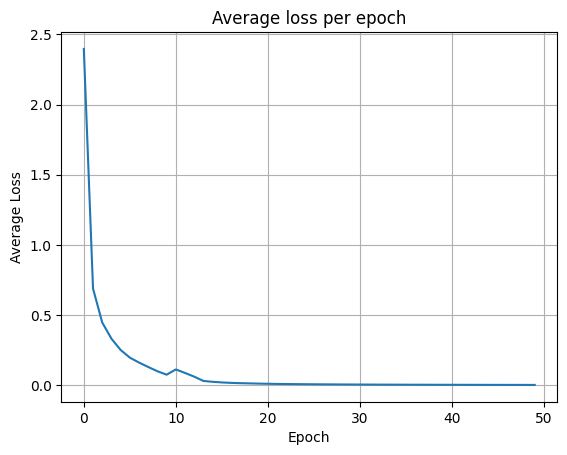

In [ ]:
plt.plot(loss_array[:50])
plt.title("Average loss per epoch")
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.grid()

In [ ]:
unique, counts = np.unique(dataset.label, return_counts=True)

In [ ]:
print(dataset.keys[unique])
print(counts)

['left' 'right' 'straight' 'up']
[157 155 156 156]


In [ ]:
from PIL import Image
my_img = Image.open("test/woman_straight.jpg").convert("L")
my_img = np.array(my_img)#.reshape(-1, 1)
my_img.shape

AttributeError: 'Image' object has no attribute 'shape'

In [ ]:
model.forward(my_img)

ValueError: not enough values to unpack (expected 4, got 2)